In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data=pd.read_csv("data.csv")
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [3]:
#here we drop the id&Unnamed:32 colomns becouse we dont need them in the training process      
data.drop(columns=data.columns[-1], inplace=True)
data.drop(columns=data.columns[0], inplace=True)

In [4]:
#we can use this info later for filling nulls or dealing with outliers 
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [5]:
#here we cheick the null values and dublicates 
print(data.isnull().sum(),'\n')
print(data.duplicated().sum())

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64 

0


array([[<Axes: title={'center': 'radius_mean'}>,
        <Axes: title={'center': 'texture_mean'}>,
        <Axes: title={'center': 'perimeter_mean'}>,
        <Axes: title={'center': 'area_mean'}>,
        <Axes: title={'center': 'smoothness_mean'}>],
       [<Axes: title={'center': 'compactness_mean'}>,
        <Axes: title={'center': 'concavity_mean'}>,
        <Axes: title={'center': 'concave points_mean'}>,
        <Axes: title={'center': 'symmetry_mean'}>,
        <Axes: title={'center': 'fractal_dimension_mean'}>],
       [<Axes: title={'center': 'radius_se'}>,
        <Axes: title={'center': 'texture_se'}>,
        <Axes: title={'center': 'perimeter_se'}>,
        <Axes: title={'center': 'area_se'}>,
        <Axes: title={'center': 'smoothness_se'}>],
       [<Axes: title={'center': 'compactness_se'}>,
        <Axes: title={'center': 'concavity_se'}>,
        <Axes: title={'center': 'concave points_se'}>,
        <Axes: title={'center': 'symmetry_se'}>,
        <Axes: title={'ce

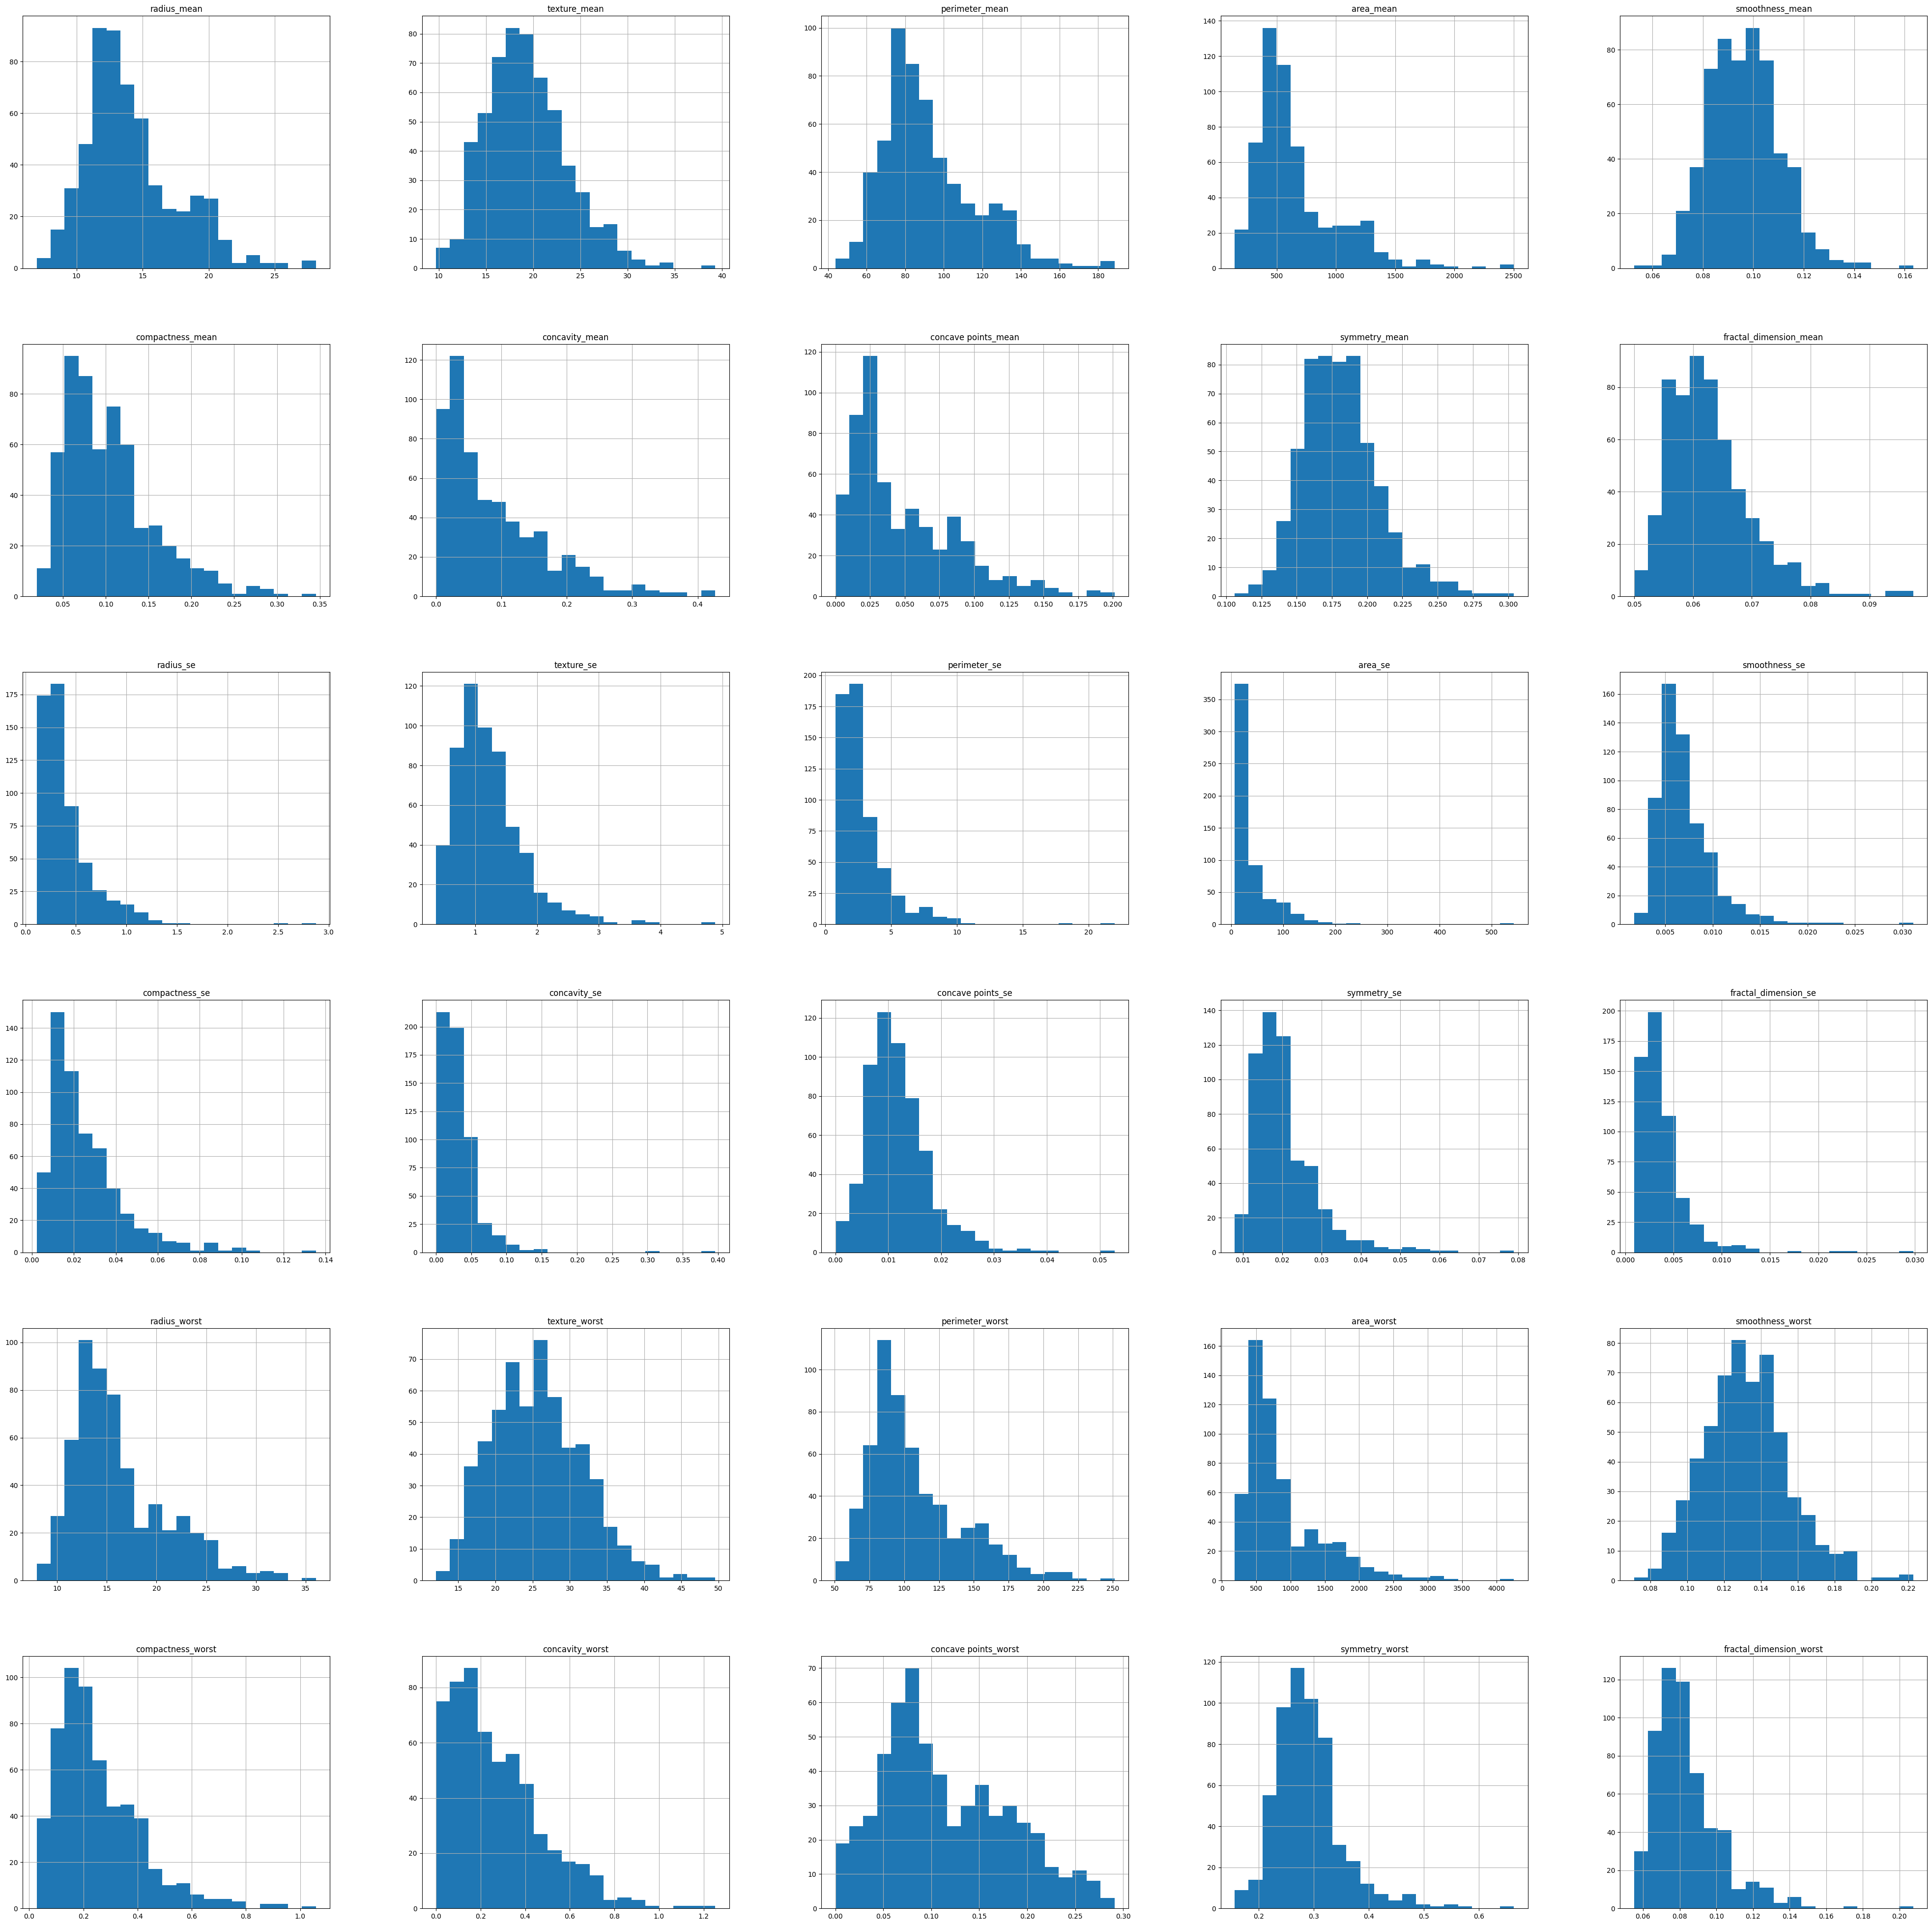

In [6]:
data.hist(bins=20, figsize=(50,50))

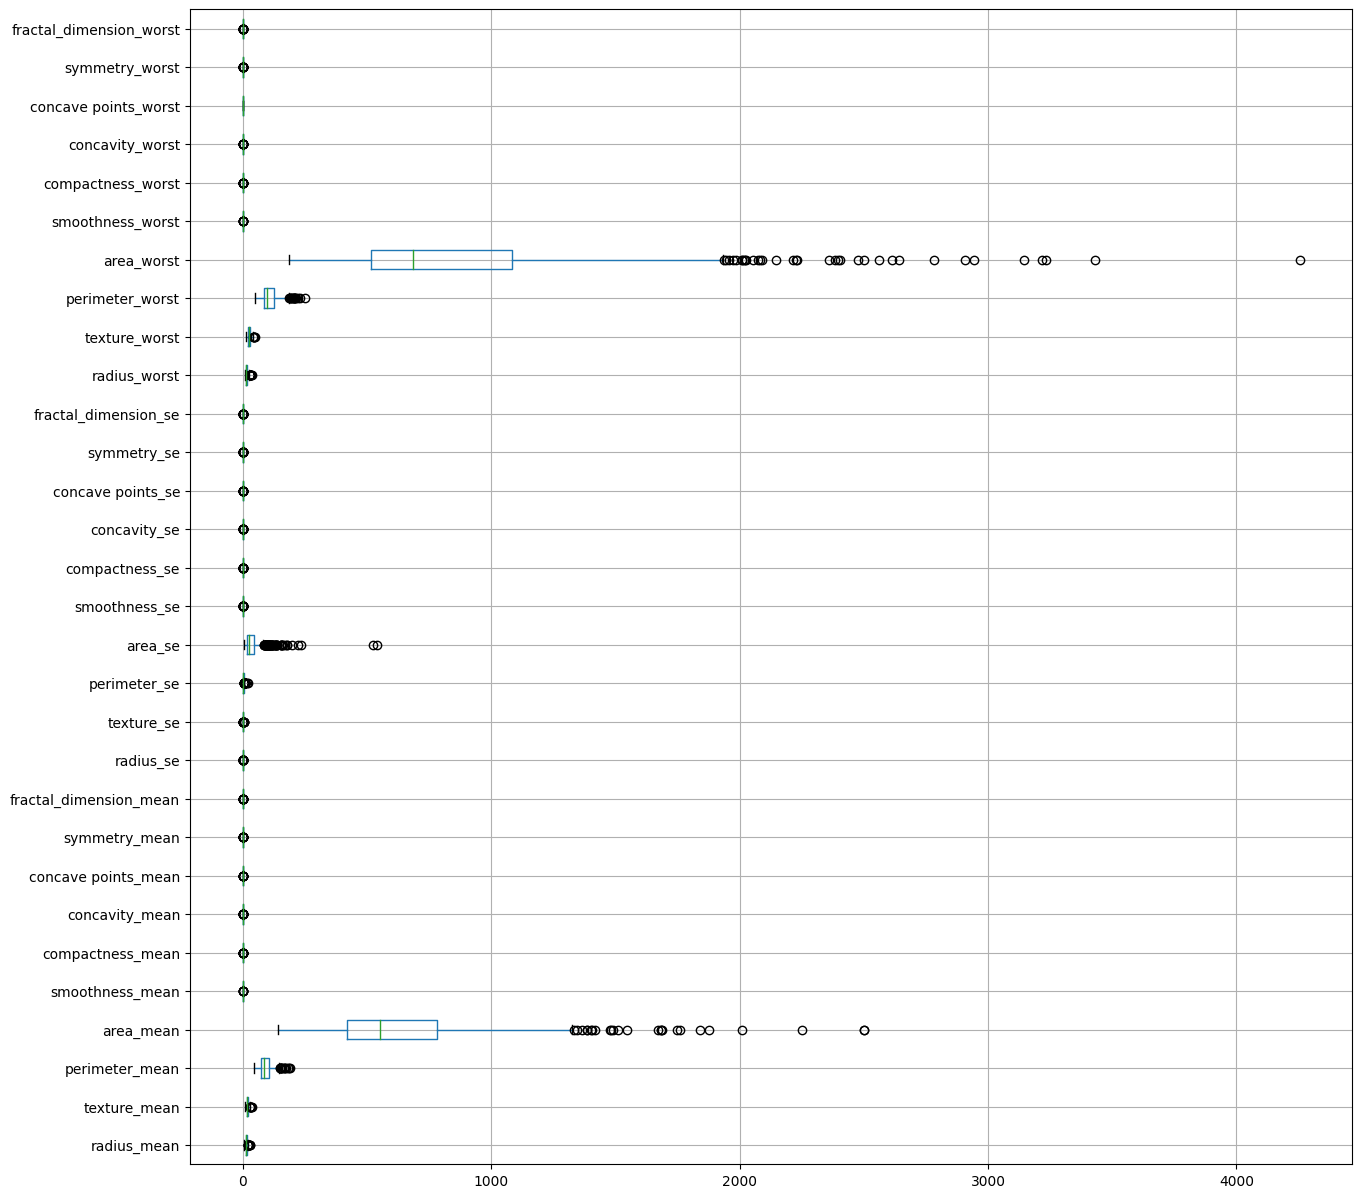

In [7]:
""" 
it is medical data and i do not have a domain knowlidge and
In some cases outliers may represent rare but valid occurrences within the data
and Excluding them could lead to a loss of important information
so i will not deal with the outlier for now 
"""
plt.figure(figsize=(15, 15))
data.boxplot(vert=0)
plt.show()


C:\Users\ahmed\AppData\Local\Temp\ipykernel_17456\1009550692.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap( data.corr(), annot = True)


<Axes: >

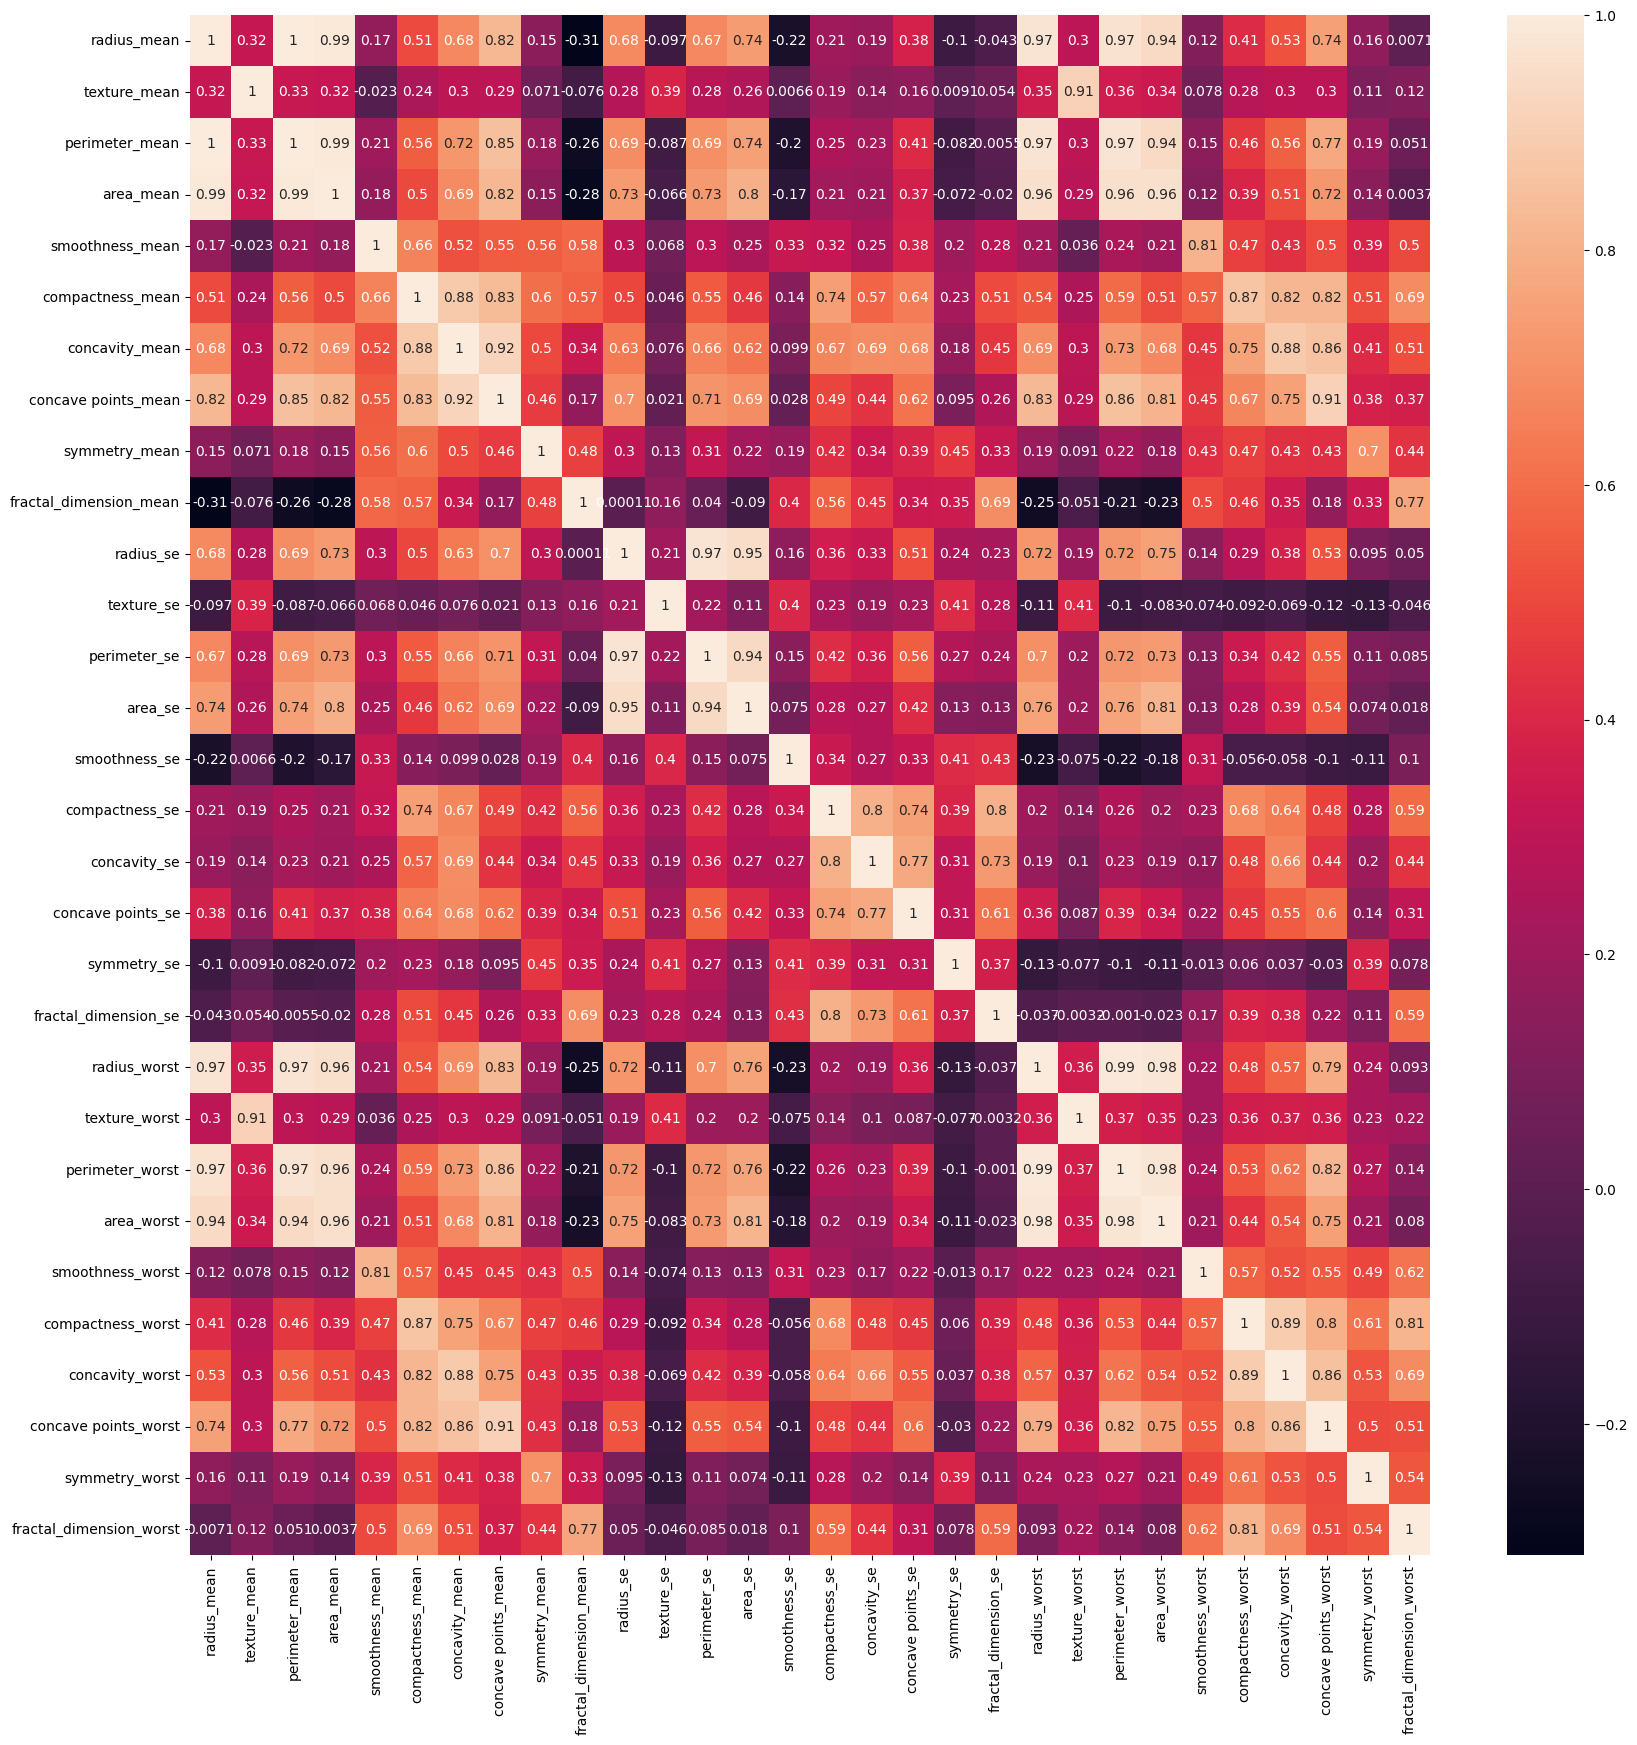

In [8]:
plt.figure(figsize=(20,20))
sns.heatmap( data.corr(), annot = True) 

In [9]:
X = data.loc[:, data.columns != 'diagnosis']
y = data.loc[:, 'diagnosis']
label_map = {'M': 1, 'B': 0}
y_numerical = y.map(label_map)


In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x = scaler.fit_transform(X)

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, make_scorer

model = LogisticRegression()

kf = KFold(n_splits=5, shuffle=True, random_state=42)

scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, pos_label='M'),
    'recall': make_scorer(recall_score, pos_label='M'),
    'roc_auc': 'roc_auc',
    'f1': make_scorer(f1_score, pos_label='M')
}

# Perform cross-validation with multiple scoring metrics
cv_results = cross_validate(model, x, y, cv=kf, scoring=scoring)

for metric in scoring.keys():
    print(f"{metric.capitalize()} Scores:", cv_results[f'test_{metric}'])

# Calculate the average scores
average_scores_lr = {metric: cv_results[f'test_{metric}'].mean() for metric in scoring.keys()}

for metric, score in average_scores_lr.items():
    print(f"Average {metric.capitalize()} Score:", score)


Accuracy Scores: [0.97368421 0.98245614 0.96491228 0.99122807 0.97345133]
Precision Scores: [0.97619048 0.94871795 0.97560976 1.         0.97777778]
Recall Scores: [0.95348837 1.         0.93023256 0.97674419 0.95652174]
Roc_auc Scores: [0.99737963 1.         0.98427776 0.99803472 0.99415964]
F1 Scores: [0.96470588 0.97368421 0.95238095 0.98823529 0.96703297]
Average Accuracy Score: 0.9771464058376029
Average Precision Score: 0.9756591917567526
Average Recall Score: 0.9633973710819008
Average Roc_auc Score: 0.9947703485449466
Average F1 Score: 0.9692078612821646


In [12]:
from sklearn.svm import SVC
 
model = SVC()

kf = KFold(n_splits=5, shuffle=True, random_state=42)

scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, pos_label='M'),
    'recall': make_scorer(recall_score, pos_label='M'),
    'roc_auc': 'roc_auc',
    'f1': make_scorer(f1_score, pos_label='M')
}



cv_results = cross_validate(model, x, y, cv=kf, scoring=scoring)

for metric in scoring.keys():
    print(f"{metric.capitalize()} Scores:", cv_results[f'test_{metric}'])

average_scores_svc = {metric: cv_results[f'test_{metric}'].mean() for metric in scoring.keys()}

for metric, score in average_scores_svc.items():
    print(f"Average {metric.capitalize()} Score:", score)


Accuracy Scores: [0.97368421 0.98245614 0.97368421 0.99122807 0.97345133]
Precision Scores: [0.97619048 0.94871795 0.97619048 1.         1.        ]
Recall Scores: [0.95348837 1.         0.95348837 0.97674419 0.93478261]
Roc_auc Scores: [0.99737963 1.         0.98722568 0.99967245 0.99286178]
F1 Scores: [0.96470588 0.97368421 0.96470588 0.98823529 0.96629213]
Average Accuracy Score: 0.9789007918025152
Average Precision Score: 0.9802197802197803
Average Recall Score: 0.9637007077856421
Average Roc_auc Score: 0.9954279075293861
Average F1 Score: 0.9715246808362611


In [13]:
from sklearn.ensemble import RandomForestClassifier
 
model = RandomForestClassifier(random_state=42)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, pos_label='M'),
    'recall': make_scorer(recall_score, pos_label='M'),
    'roc_auc': 'roc_auc',
    'f1': make_scorer(f1_score, pos_label='M')
}

cv_results = cross_validate(model, x, y, cv=kf, scoring=scoring)

for metric in scoring.keys():
    print(f"{metric.capitalize()} Scores:", cv_results[f'test_{metric}'])

average_scores_rf = {metric: cv_results[f'test_{metric}'].mean() for metric in scoring.keys()}

for metric, score in average_scores_rf.items():
    print(f"Average {metric.capitalize()} Score:", score)
 

Accuracy Scores: [0.96491228 0.96491228 0.93859649 0.96491228 0.96460177]
Precision Scores: [0.97560976 0.94594595 0.92857143 0.93333333 0.97727273]
Recall Scores: [0.93023256 0.94594595 0.90697674 0.97674419 0.93478261]
Roc_auc Scores: [0.99475925 0.9980695  0.98116607 0.99770717 0.96495782]
F1 Scores: [0.95238095 0.94594595 0.91764706 0.95454545 0.95555556]
Average Accuracy Score: 0.9595870206489675
Average Precision Score: 0.9521466382441993
Average Recall Score: 0.9389364086027381
Average Roc_auc Score: 0.9873319620594723
Average F1 Score: 0.9452149934502877


In [14]:
from sklearn.ensemble import AdaBoostClassifier
 

model = AdaBoostClassifier(random_state=42)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, pos_label='M'),
    'recall': make_scorer(recall_score, pos_label='M'),
    'roc_auc': 'roc_auc',
    'f1': make_scorer(f1_score, pos_label='M')
}

cv_results = cross_validate(model, x, y, cv=kf, scoring=scoring)

for metric in scoring.keys():
    print(f"{metric.capitalize()} Scores:", cv_results[f'test_{metric}'])

average_scores_ab = {metric: cv_results[f'test_{metric}'].mean() for metric in scoring.keys()}

for metric, score in average_scores_ab.items():
    print(f"Average {metric.capitalize()} Score:", score)


Accuracy Scores: [0.97368421 0.97368421 0.95614035 0.99122807 0.9380531 ]
Precision Scores: [0.97619048 0.925      0.975      1.         0.97560976]
Recall Scores: [0.95348837 1.         0.90697674 0.97674419 0.86956522]
Roc_auc Scores: [0.99705208 0.995437   0.98624304 0.98722568 0.98799481]
F1 Scores: [0.96470588 0.96103896 0.93975904 0.98823529 0.91954023]
Average Accuracy Score: 0.9665579878900792
Average Precision Score: 0.9703600464576073
Average Recall Score: 0.9413549039433772
Average Roc_auc Score: 0.9907905206433499
Average F1 Score: 0.9546558807078369


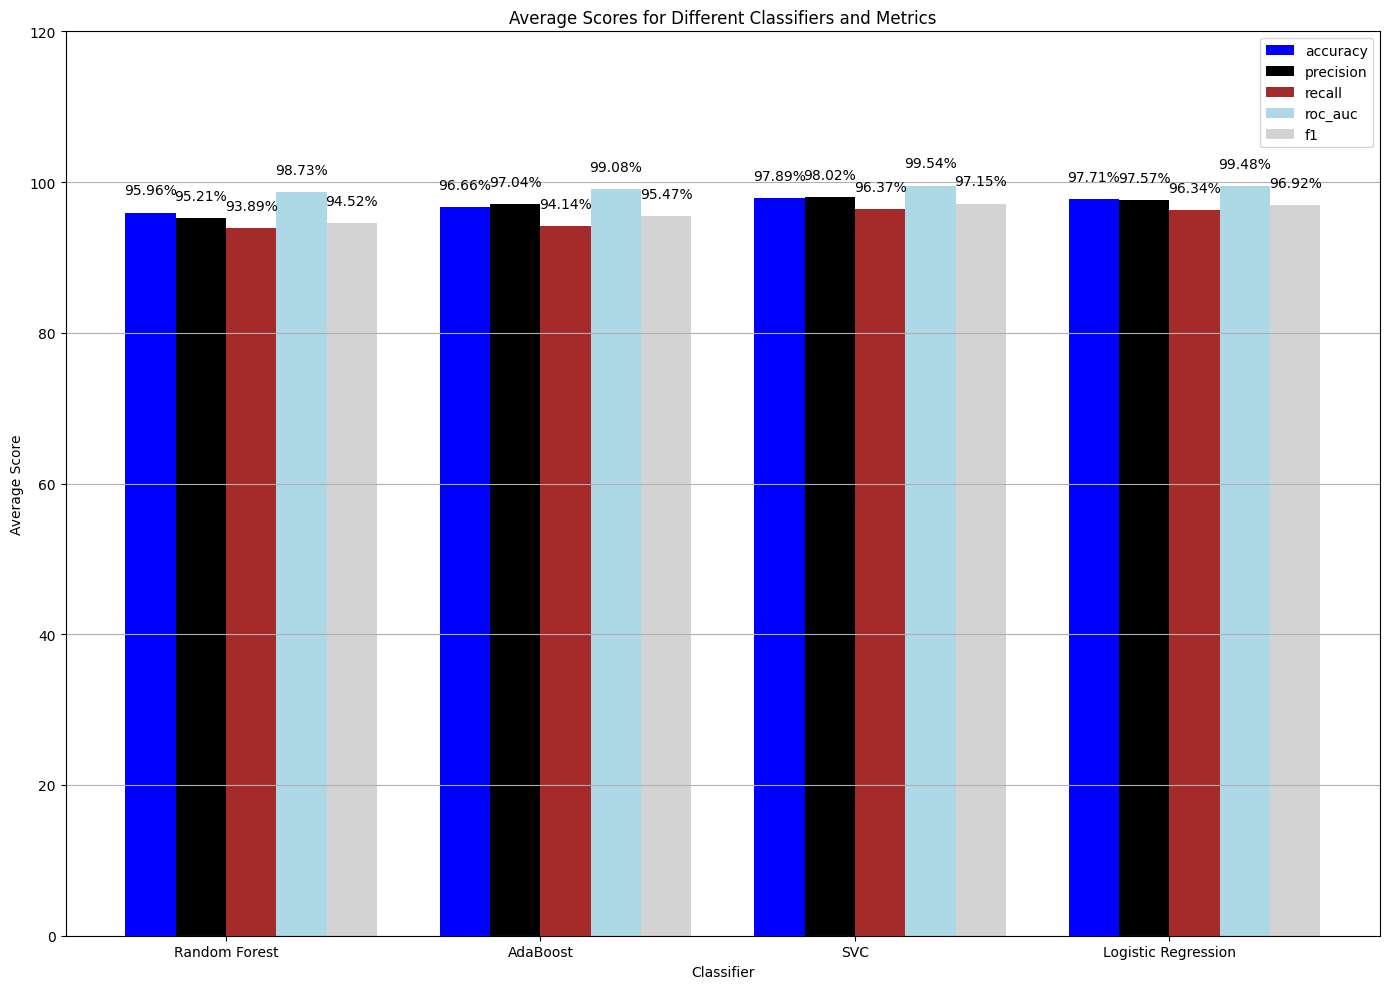

In [15]:
# Average scores for each model
models = ["Random Forest", "AdaBoost", "SVC", "Logistic Regression"]
metrics = ["accuracy", "precision", "recall", "roc_auc", "f1"]
scores = {
    "Random Forest": average_scores_rf,
    "AdaBoost": average_scores_ab,
    "SVC": average_scores_svc,
    "Logistic Regression": average_scores_lr
}

# Convert scores to numpy array
scores_array = np.array([[scores[model][metric] * 100 for metric in metrics] for model in models])

# Plotting the grouped bar plot
plt.figure(figsize=(14, 10))  

bar_width = 0.16
index = np.arange(len(models))

colors = ["blue", "black", "brown", "lightblue", "lightgrey"]

for i, metric in enumerate(metrics):
    bars = plt.bar(index + i * bar_width, scores_array[:, i], bar_width, label=metric, color=colors[i])
    # Add text annotations
    for bar, score in zip(bars, scores_array[:, i]):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 2, f'{score:.2f}%', ha='center', va='bottom')

plt.xlabel('Classifier')
plt.ylabel('Average Score')
plt.title('Average Scores for Different Classifiers and Metrics')

plt.grid(axis='y')

plt.xticks(index + 1.5 * bar_width, models)
plt.legend()
plt.ylim(0, 120)
plt.tight_layout()
plt.show()
